## Program NO. 4 : Implement Bayes Classifier on pima diabetes dataset 

In [30]:
#importing all libraries
import numpy as np
import pandas as pd
import seaborn as sns
import math
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
%matplotlib inline

In [20]:
df=pd.read_csv("pima-indians-diabetes-data.csv")
df.head(5)

,Col1,Col2,Col3,Col4,Col5,Col6,Col7,Col8,Target
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
df.corr()

,Col1,Col2,Col3,Col4,Col5,Col6,Col7,Col8,Target
Col1,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Col2,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
Col3,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
Col4,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Col5,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
Col6,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
Col7,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Col8,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Target,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


## Feature Scaling

In [5]:
from sklearn.preprocessing import StandardScaler
std=StandardScaler()

In [7]:
std.fit(df.drop("Target",axis=1))

StandardScaler()

In [ ]:
scaled_features=std.transform(df.drop("Target",axis=1))

In [15]:
scaled_features[0:5]

array([[ 0.63994726,  0.84832379,  0.14964075,  0.90726993, -0.69289057,
         0.20401277,  0.46849198,  1.4259954 ],
       [-0.84488505, -1.12339636, -0.16054575,  0.53090156, -0.69289057,
        -0.68442195, -0.36506078, -0.19067191],
       [ 1.23388019,  1.94372388, -0.26394125, -1.28821221, -0.69289057,
        -1.10325546,  0.60439732, -0.10558415],
       [-0.84488505, -0.99820778, -0.16054575,  0.15453319,  0.12330164,
        -0.49404308, -0.92076261, -1.04154944],
       [-1.14185152,  0.5040552 , -1.50468724,  0.90726993,  0.76583594,
         1.4097456 ,  5.4849091 , -0.0204964 ]])

In [ ]:
df=pd.DataFrame(scaled_features,columns=df.columns[:-1])

In [14]:
df.head(5)

,Col1,Col2,Col3,Col4,Col5,Col6,Col7,Col8
0,0.639947,0.848324,0.149641,0.907270,-0.692891,0.204013,0.468492,1.425995
1,-0.844885,-1.123396,-0.160546,0.530902,-0.692891,-0.684422,-0.365061,-0.190672
2,1.233880,1.943724,-0.263941,-1.288212,-0.692891,-1.103255,0.604397,-0.105584
3,-0.844885,-0.998208,-0.160546,0.154533,0.123302,-0.494043,-0.920763,-1.041549
4,-1.141852,0.504055,-1.504687,0.907270,0.765836,1.409746,5.484909,-0.020496


In [19]:
X=df.iloc[:,0:8]

In [21]:
y=df.iloc[:,8]

In [23]:
#train test split
X_train , X_test, y_train, y_test= train_test_split(scaled_features,df.Target,test_size=0.3)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(537, 8)
(537,)
(231, 8)
(231,)


## Naive Bayes

In [24]:
from sklearn.naive_bayes import GaussianNB

In [25]:
nb=GaussianNB()
nb.fit(X_train,y_train)

GaussianNB()

In [26]:
y_pred=nb.predict(X_test)

In [27]:
acc=accuracy_score(y_test,y_pred)
acc                     

0.7748917748917749

In [28]:
cr=pd.DataFrame(data=confusion_matrix(y_test.values,y_pred),index=[0,1],columns=[0,1])
cr

,0,1
0,129,26
1,26,50


Text(0.5, 23.52222222222222, 'Predicted label')

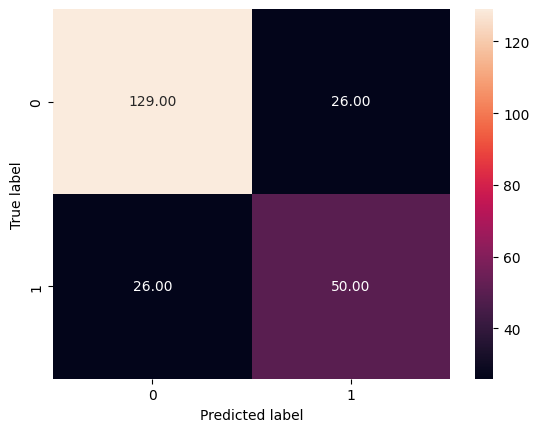

In [29]:
sns.heatmap(cr, annot=True,  fmt='.2f', xticklabels = [0,1] , yticklabels = [0,1])
plt.ylabel('True label')
plt.xlabel('Predicted label')